In [105]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input, LSTM

# Part 3 Solution Code

## Data Prep

In [11]:
# Load and preview the dataset
data = pd.read_csv("Final_News_DF_Labeled_ExamDataset.csv")
print("Train Data Dimensions:\n", data.shape, "\n")
print("Train Data Preview:\n", data.head())


Train Data Dimensions:
 (1493, 301) 

Train Data Preview:
       LABEL  according  agency  ahead  alabama  amazon  america  american  \
0  politics          0       0      0        0       0        0         0   
1  politics          0       0      0        0       0        0         0   
2  politics          0       0      0        0       0        0         0   
3  politics          0       0      0        0       0        0         0   
4  politics          0       0      0        0       0        0         0   

   announced  appeared  ...  wolverines  women  work  working  world  wrote  \
0          1         0  ...           0      0     0        0      0      0   
1          0         0  ...           0      0     0        0      0      0   
2          0         0  ...           0      0     0        0      0      0   
3          0         0  ...           0      0     0        0      0      0   
4          0         0  ...           0      0     0        0      0      0   

   

In [68]:
# Data processing
y = data.iloc[:, 0].values                                                                          # y (labels) is the first column
X = data.iloc[:, 1:].values                                                                         # X is all columns except the first
label_encoder = LabelEncoder()                                                                      # label_encoder keeps track of the class to integer mapping
y_encoded = label_encoder.fit_transform(y)                                                          # Encode labels as integers (e.g., 'football' -> 0, 'science' -> 1, 'politics' -> 2)
y_onehot = tf.keras.utils.to_categorical(y_encoded)                                                 # One-hot encode the labels for categorical output
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=100)   # Split the data

print("Train Data Dimensions:\n", X_train.shape, "\nTrain Data Snippet:\n", X_train[0:5, 0:10], "\nTrain Labels Snippet:\n", y_train[0:5,], "\n")   # show train
print("Test Data Dimensions:\n", X_test.shape, "\nTest Data Snippet:\n", X_test[0:5, 0:10], "\nTest Labels Snippet:\n", y_test[0:5,])               # show test

Train Data Dimensions:
 (1194, 300) 
Train Data Snippet:
 [[0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]] 
Train Labels Snippet:
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]] 

Test Data Dimensions:
 (299, 300) 
Test Data Snippet:
 [[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]] 
Test Labels Snippet:
 [[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


## ANN

In [78]:
# ANN specification
ANN_model = Sequential([
    Input(shape=(X_train.shape[1],)),   # Input layer with the number of features
    Dense(128, activation='relu'),      # Hidden layer with 128 neurons and ReLU activation
    Dense(64, activation='relu'),       # Hidden layer with 64 neurons
    Dense(3, activation='softmax')      # Output layer with 3 neurons for 3 classes
])
ANN_model.compile(optimizer='adam',             # adam is standard
              loss='categorical_crossentropy',  # loss is categorical crossentropy because the model outputs class label predictions
              metrics=['accuracy'])             # accuracy is also standard
ANN_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,979 (183.51 KB)

 Trainable params: 46,979 (183.51 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
# ANN training
ANN_epochs = 20
Hist_ANN = ANN_model.fit(X_train, y_train,              # Use train data to train the model
                    validation_data=(X_test, y_test),   # Use test data to determine the generalization error
                    epochs=ANN_epochs,                  # Low number of training epochs
                    batch_size=32,                      # Arbitrary batch size
                    verbose=1)                          # Shows progress

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4669 - loss: 1.0420 - val_accuracy: 0.6321 - val_loss: 0.8815
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7364 - loss: 0.8098 - val_accuracy: 0.7492 - val_loss: 0.6808
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8099 - loss: 0.5643 - val_accuracy: 0.7559 - val_loss: 0.5964
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8243 - loss: 0.4312 - val_accuracy: 0.7559 - val_loss: 0.5995
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8761 - loss: 0.3312 - val_accuracy: 0.7458 - val_loss: 0.6124
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8918 - loss: 0.2928 - val_accuracy: 0.7224 - val_loss: 0.6601
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9273 - loss: 0.2348 - val_accuracy: 0.7425 - val_loss: 0.6999
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9119 - loss: 0.2152 - val_accuracy: 0.7291 - val_loss:

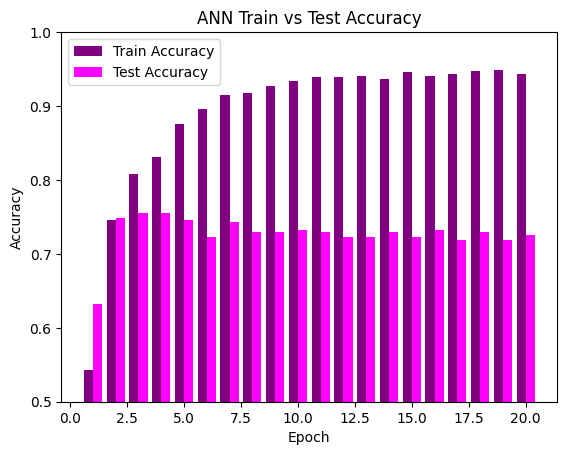

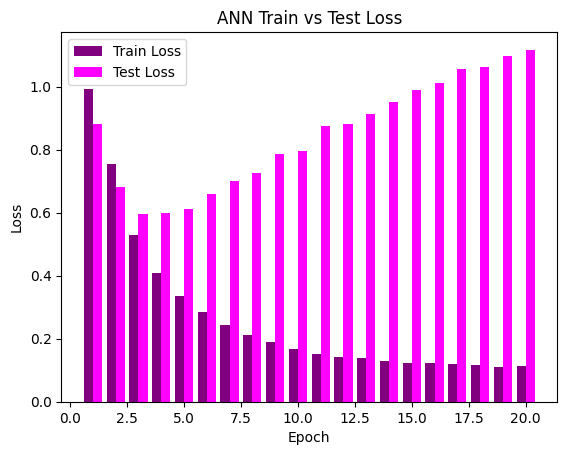

In [82]:
ANN_train_loss = Hist_ANN.history['loss']                # Get train loss
ANN_train_accuracy = Hist_ANN.history['accuracy']        # Get train accuracy
ANN_test_loss = Hist_ANN.history['val_loss']             # Get test loss
ANN_test_accuracy = Hist_ANN.history['val_accuracy']     # Get test accuracy

# Plotting accuracy at of each epoch
plt.bar([e - 0.2 for e in range(1, ANN_epochs+1)], ANN_train_accuracy, width=0.4, color='purple', label='Train Accuracy')
plt.bar([e + 0.2 for e in range(1, ANN_epochs+1)], ANN_test_accuracy, width=0.4, color='magenta', label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('ANN Train vs Test Accuracy')
plt.ylim([0.5, 1])
plt.legend()
plt.show()

# Plotting loss (CCE) at of each epoch
plt.bar([e - 0.2 for e in range(1, ANN_epochs+1)], ANN_train_loss, width=0.4, color='purple', label='Train Loss')
plt.bar([e + 0.2 for e in range(1, ANN_epochs+1)], ANN_test_loss, width=0.4, color='magenta', label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ANN Train vs Test Loss')
plt.legend()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


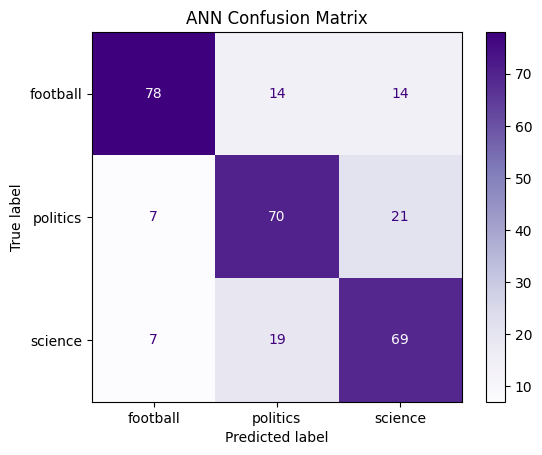

In [81]:
y_pred = np.argmax(ANN_model.predict(X_test), axis=1)   # Get predictions as class indices
y_true = np.argmax(y_test, axis=1)                      # Convert one-hot encoded test labels to class indices
labels = label_encoder.classes_                         # Retrieve original class labels (e.g., 'football', 'science', 'politics')

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Purples, values_format='d')
plt.title("ANN Confusion Matrix")
plt.show()

In [120]:
print(f"Test Accuracy: {ANN_test_accuracy[-1]:.2f}")

Test Accuracy: 0.73


## CNN

In [98]:
# reshaped input to (num_samples, 301, 1) to make it compatible with Conv1D
X_test_CNN = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
X_train_CNN = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

print("Train Data Dimensions:\n", X_train_CNN.shape, "\nTrain Data Snippet:\n", X_train_CNN[0:5, 0:5], "\nTrain Labels Snippet:\n", y_train[0:5,], "\n")   # show train
print("Test Data Dimensions:\n", X_test_CNN.shape, "\nTest Data Snippet:\n", X_test_CNN[0:5, 0:10], "\nTest Labels Snippet:\n", y_test[0:5,])               # show test

Train Data Dimensions:
 (1194, 300, 1) 
Train Data Snippet:
 [[[0]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [0]]] 
Train Labels Snippet:
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]] 

Test Data Dimensions:
 (299, 300, 1) 
Test Data Snippet:
 [[[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]]] 
Test Labels Snippet:
 [[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [99]:
# CNN specification
CNN_model = Sequential([
    Input(shape=(X_train.shape[1], 1)),                      # Input layer for 1D convolution
    Conv1D(filters=64, kernel_size=3, activation='relu'),    # 1D Convolutional layer
    MaxPooling1D(pool_size=2),                               # Downsampling layer
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),                                               # Flatten the output for Dense layers
    Dense(64, activation='relu'),                            # Fully connected layer
    Dropout(0.5),                                            # Dropout layer to prevent overfitting by randomly turning off neurons during training.
    Dense(3, activation='softmax')                           # Output layer with 3 classes
])
CNN_model.compile(optimizer='adam',             # adam is standard
              loss='categorical_crossentropy',  # loss is categorical crossentropy because the model outputs class label predictions
              metrics=['accuracy'])             # accuracy is also standard
CNN_model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 298, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 149, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 147, 32)        │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 73, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2336)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │       149,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 156,195 (610.14 KB)

 Trainable params: 156,195 (610.14 KB)

 Non-trainable params: 0 (0.00 B)

In [101]:
# CNN training
CNN_epochs = 20
Hist_CNN = CNN_model.fit(X_train_CNN, y_train,
                    validation_data=(X_test, y_test),
                    epochs=CNN_epochs,            # Same number of epochs as ANN
                    batch_size=32,                # Arbitrary batch size
                    verbose=1)

Epoch 1/20


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9157 - loss: 0.1793 - val_accuracy: 0.7224 - val_loss: 0.9906
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9192 - loss: 0.1886 - val_accuracy: 0.7224 - val_loss: 1.0160
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9330 - loss: 0.1677 - val_accuracy: 0.7090 - val_loss: 1.0949
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9282 - loss: 0.1692 - val_accuracy: 0.6990 - val_loss: 1.1180
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9210 - loss: 0.1707 - val_accuracy: 0.7191 - val_loss: 1.1304
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9217 - loss: 0.1521 - val_accuracy: 0.7191 - val_loss: 1.2222
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9263 - loss: 0.1540 - val_accuracy: 0.7258 - val_loss: 1.2234
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9215 - loss: 0.1802 - val_accuracy: 0.7324 - val_loss: 1.1573
Epo

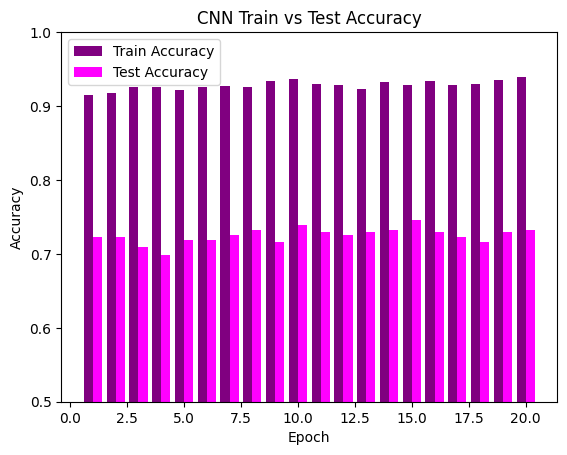

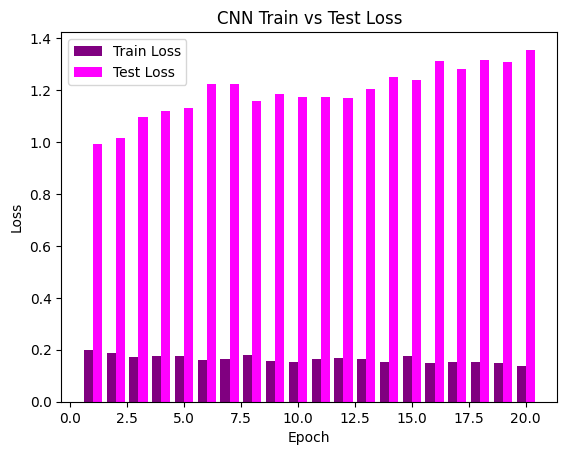

In [104]:
CNN_train_loss = Hist_CNN.history['loss']                # Get train loss
CNN_train_accuracy = Hist_CNN.history['accuracy']        # Get train accuracy
CNN_test_loss = Hist_CNN.history['val_loss']             # Get test loss
CNN_test_accuracy = Hist_CNN.history['val_accuracy']     # Get test accuracy

# Plotting accuracy at of each epoch
plt.bar([e - 0.2 for e in range(1, CNN_epochs+1)], CNN_train_accuracy, width=0.4, color='purple', label='Train Accuracy')
plt.bar([e + 0.2 for e in range(1, CNN_epochs+1)], CNN_test_accuracy, width=0.4, color='magenta', label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Train vs Test Accuracy')
plt.ylim([0.5, 1])
plt.legend()
plt.show()

# Plotting loss (CCE) at of each epoch
plt.bar([e - 0.2 for e in range(1, CNN_epochs+1)], CNN_train_loss, width=0.4, color='purple', label='Train Loss')
plt.bar([e + 0.2 for e in range(1, CNN_epochs+1)], CNN_test_loss, width=0.4, color='magenta', label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CNN Train vs Test Loss')
plt.legend()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


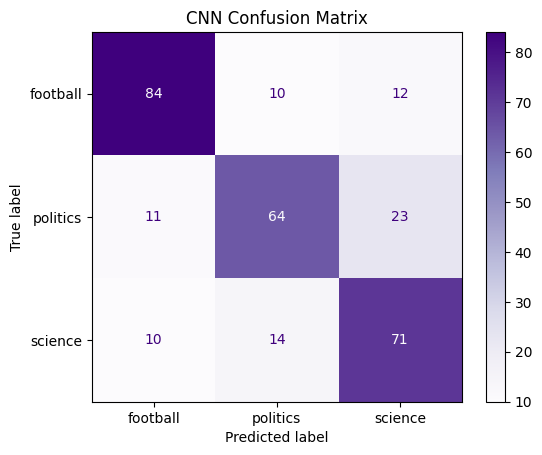

In [103]:
y_pred = np.argmax(CNN_model.predict(X_test_CNN), axis=1)   # Get predictions as class indices
y_true = np.argmax(y_test, axis=1)                          # Convert one-hot encoded test labels to class indices
labels = label_encoder.classes_                             # Retrieve original class labels (e.g., 'football', 'science', 'politics')

# Plotting confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Purples, values_format='d')
plt.title("CNN Confusion Matrix")
plt.show()

In [119]:
print(f"Test Accuracy: {CNN_test_accuracy[-1]:.2f}")

Test Accuracy: 0.73


## LSTM

In [106]:
# Reshape inputs for LSTM: (samples, timesteps=1, features)
X_train_LSTM = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_LSTM = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print("Train Data Dimensions:\n", X_train_LSTM.shape, "\nTrain Data Snippet:\n", X_train_LSTM[0:5, 0:5], "\nTrain Labels Snippet:\n", y_train[0:5,], "\n")   # show train
print("Test Data Dimensions:\n", X_test_LSTM.shape, "\nTest Data Snippet:\n", X_test_LSTM[0:5, 0:5], "\nTest Labels Snippet:\n", y_test[0:5,])              # show test

Train Data Dimensions:
 (1194, 1, 300) 
Train Data Snippet:
 [[[0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]]

 [[0 0 0 ... 1 0 0]]] 
Train Labels Snippet:
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]] 

Test Data Dimensions:
 (299, 1, 300) 
Test Data Snippet:
 [[[0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]]] 
Test Labels Snippet:
 [[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [107]:
LSTM_model = Sequential([
    Input(shape=(1, X_train_LSTM.shape[2])),               # Input layer (timesteps=1, features=301)
    LSTM(64, activation='tanh', return_sequences=False),   # LSTM layer with 64 units
    Dense(32, activation='relu'),                          # Dense layer with 32 neurons
    Dense(3, activation='softmax')                         # Output layer with 3 neurons for 3 classes
])
LSTM_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
LSTM_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        93,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,619 (373.51 KB)

 Trainable params: 95,619 (373.51 KB)

 Non-trainable params: 0 (0.00 B)

In [108]:
# LSTM training
LSTM_epochs = 20
Hist_LSTM = LSTM_model.fit(X_train_LSTM, y_train,             # Use train data to train the model
                    validation_data=(X_test_LSTM, y_test),    # Use test data to determine the generalization error
                    epochs=LSTM_epochs,                       # Low number of training epochs
                    batch_size=32,                            # Arbitrary batch size
                    verbose=1)                                # Shows progress

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4827 - loss: 1.0794 - val_accuracy: 0.6823 - val_loss: 1.0008
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7742 - loss: 0.9462 - val_accuracy: 0.7458 - val_loss: 0.8132
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7876 - loss: 0.7420 - val_accuracy: 0.7525 - val_loss: 0.6396
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8185 - loss: 0.5510 - val_accuracy: 0.7625 - val_loss: 0.5754
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8436 - loss: 0.4392 - val_accuracy: 0.7692 - val_loss: 0.5767
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8464 - loss: 0.3995 - val_accuracy: 0.7559 - val_loss: 0.5868
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8595 - loss: 0.3702 - val_accuracy: 0.7525 - val_loss: 0.6040
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8910 - loss: 0.3166 - val_accuracy: 0.7492 - val_loss:

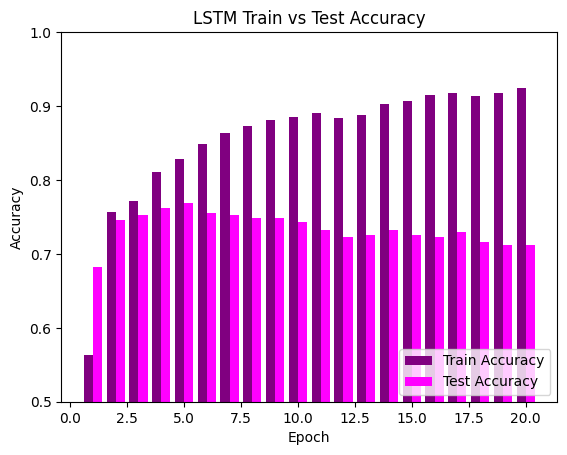

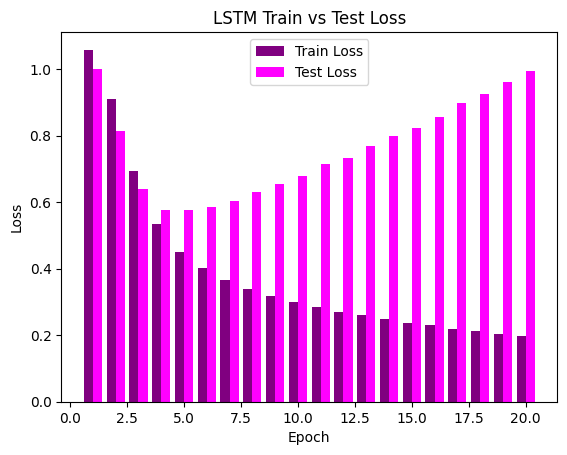

In [110]:
LSTM_train_loss = Hist_LSTM.history['loss']                # Get train loss
LSTM_train_accuracy = Hist_LSTM.history['accuracy']        # Get train accuracy
LSTM_test_loss = Hist_LSTM.history['val_loss']             # Get test loss
LSTM_test_accuracy = Hist_LSTM.history['val_accuracy']     # Get test accuracy

# Plotting accuracy at of each epoch
plt.bar([e - 0.2 for e in range(1, LSTM_epochs+1)], LSTM_train_accuracy, width=0.4, color='purple', label='Train Accuracy')
plt.bar([e + 0.2 for e in range(1, LSTM_epochs+1)], LSTM_test_accuracy, width=0.4, color='magenta', label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('LSTM Train vs Test Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Plotting loss (CCE) at of each epoch
plt.bar([e - 0.2 for e in range(1, LSTM_epochs+1)], LSTM_train_loss, width=0.4, color='purple', label='Train Loss')
plt.bar([e + 0.2 for e in range(1, LSTM_epochs+1)], LSTM_test_loss, width=0.4, color='magenta', label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM Train vs Test Loss')
plt.legend()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


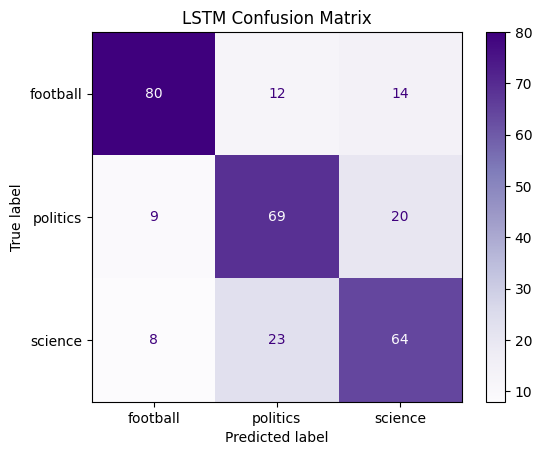

In [111]:
y_pred = np.argmax(LSTM_model.predict(X_test_LSTM), axis=1)  # Get predictions as class indices
y_true = np.argmax(y_test, axis=1)                           # Convert one-hot encoded test labels to class indices
labels = label_encoder.classes_                              # Retrieve original class labels (e.g., 'football', 'science', 'politics')

# Plotting confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Purples, values_format='d')
plt.title("LSTM Confusion Matrix")
plt.show()

In [116]:
print(f"Test Accuracy: {LSTM_test_accuracy[-1]:.2f}")

Test Accuracy: 0.71
